In [1]:
import numpy as np
from numba import njit

from utils import initialize_neighbors, render_sudoku, recalculate_g, initialize_q, is_new_label_consistent, get_example

---

## Input

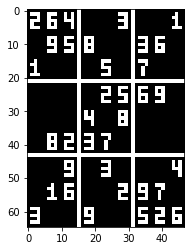

In [2]:
sudoku_input = get_example(2) # [0,3]
render_sudoku(sudoku_input)
sudoku_source = np.copy(sudoku_input)

## Init

In [3]:
w, h, n_labels, n_neighbours = 9, 9, 9, 20
width, height = w, h
neighbors_structure = np.zeros((h, w, n_neighbours)) # h, w, n_neighbors
for i in range(h):
    for j in range(w):
        neighbors_structure[i, j, :] = initialize_neighbors(i, j)

q = np.ones((h, w, n_labels), dtype=bool) # h, w, n_digits
g = np.ones((h, w, n_neighbours, n_labels, n_labels), dtype=bool) # h, w, n_neighbors, k, k_

---

## Main 

In [4]:
## initialization part
# initialize Q
q = initialize_q(sudoku_input, height,width,n_labels)
finished = False
refused = False
sudoku_copy = sudoku_input.copy()
for i in range(height):
    for j in range(width):
        # if not filled
        if sudoku_copy[i,j] == 0 and not finished:
            for k in range(n_labels):
                sudoku_copy[i,j] = k + 1
                ##### update g #######
                q[i, j, :] = 0
                q[i, j, k] = 1
                ######################
                ##### update g #######
                g = recalculate_g(sudoku_copy, neighbors_structure, height, width, n_labels, n_neighbours)
                ######################
                is_consistent = is_new_label_consistent(q, g, neighbors_structure)
                if is_consistent:
                    sudoku_input[i, j] = k + 1
                    break
                if k == n_labels - 1 and not is_consistent:
                    #print("!!! Not solvable sudoku !!!")
                    refused = True
                    finished = True
                q[i, j, :] = 0


---

## Result

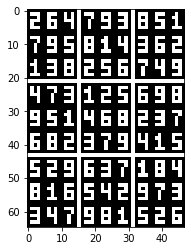

In [5]:
# Result
if refused:
    print(f"System says: 'I refuse!'")
else:
    render_sudoku(sudoku_input)

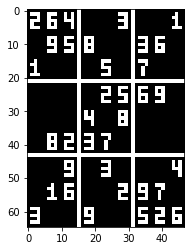

In [6]:
# Input
render_sudoku(sudoku_source)